In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import random
from math import trunc

In [2]:
root_path = "/Users/dabeeo/Desktop/"

In [3]:
img = cv2.imread("/Users/dabeeo/Desktop/ccat.png")

In [4]:
def show_cv_image(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

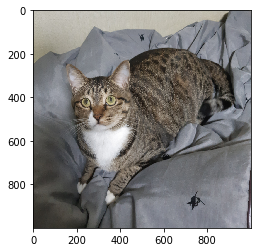

In [5]:
show_cv_image(img)

In [6]:
def flip_image_vertical(image):
    img = cv2.flip(image, 1)
    return img

In [7]:
def flip_image_horizontal(image):
    img = cv2.flip(image, 0)
    return img

In [8]:
temp = flip_image_vertical(img)

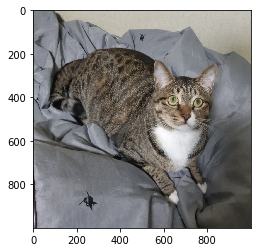

In [9]:
show_cv_image(temp)

In [10]:
temp = flip_image_horizontal(img)

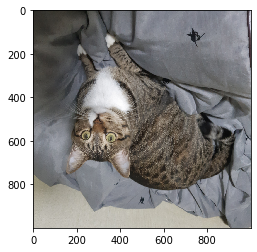

In [11]:
show_cv_image(temp)

In [12]:
def brightness(image, value=50):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [18]:
temp = brightness(img, 50)

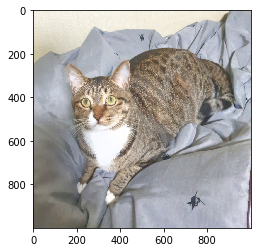

In [19]:
show_cv_image(temp)

In [20]:
def darkness(image, value=50):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    lim = value
    v[v > lim] -= value
    v[v <= lim] = 0
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [21]:
temp = darkness(img, 50)

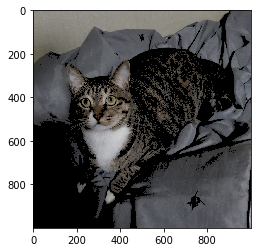

In [22]:
show_cv_image(temp)

In [23]:
def rotation(image, angle=90):
    rows, cols = image.shape[:2]
    rotate = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    dst = cv2.warpAffine(image, rotate, (cols, rows))
    
    return dst

In [24]:
temp = rotation(img, 90)

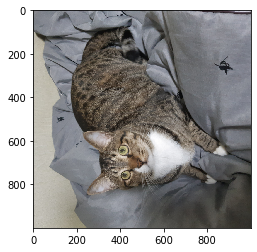

In [25]:
show_cv_image(temp)

In [26]:
def zoom_in(image, scale=0.6):
    h, w, c = image.shape
    
    zoom_w = trunc(w * scale)
    zoom_h = trunc(h * scale)
    
    rand_w = random.randint(0, w - zoom_w)
    rand_h = random.randint(0, h - zoom_h)
    
    pts1 = np.float32([[rand_w, rand_h], [rand_w, rand_h+zoom_h], [rand_w+zoom_w, rand_h], [rand_w+zoom_w, rand_h+zoom_h]])
    pts2 = np.float32([[0,0], [0,h], [w,0], [w,h]])
    
    img = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(image, img, (w, h))
    
    return dst    

In [27]:
temp = zoom_in(img, 0.6)

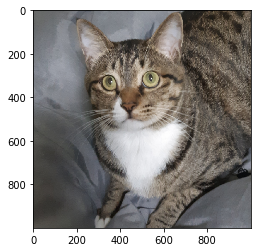

In [28]:
show_cv_image(temp)